# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

Stumpy Tutorial Time Series Chains:
https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

Matrix Profile VII: Time Series Chains Calibration Instruction:
https://docs.google.com/presentation/d/1-jEynFIkjDR88QFtbHN2Iz8DXY8wMVet/edit#slide=id.p1

Robust Time Series Chain Discovery with Incremental Nearest Neighbors:
https://sites.google.com/view/robust-time-series-chain-22 

In [1]:
import helper.testdata as testdata
import helper.utils as utils
import helper.calculate as calculate
import helper.visualize as visualize

## Chain Robustness (Robustness Paper) ##

recall and precision: hits are with overlap > 50%

In [3]:
# Parameter
use_case = "chains"
data_name = "robustness/BME_1"
T = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "ts")
l = testdata.load_from_mat("../data/" + use_case + "/" + data_name + ".mat", "l")

print(len(T))

ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiments ###

In [5]:
# Hyperparameter
target_w = int(l[0])
m = None
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=15) if target_w is None else utils.calculate_max_d_from_target_w(target_w)

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [6]:
# calculate
calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, target_w, m)

Calculated MP for: w=128, m=128, d=1, offset=0, groundtruthD1=True
[ 2056  8892 18358 26227 43710 51409 52949]
Calculated MP for: w=129, m=65, d=2, offset=0, groundtruthD1=True
[ 4318  7546 13397 24522 25641 31810 47300 53094]
Calculated MP for: w=127, m=43, d=3, offset=0, groundtruthD1=True
[  290  4855 17673 19930 36826 53600]
Calculated MP for: w=129, m=33, d=4, offset=0, groundtruthD1=True
[  377  1130  1553 12839 16255 31733 48724]
Calculated MP for: w=126, m=26, d=5, offset=0, groundtruthD1=True
[   70 11146 20244 23876 27542 47445 55426]
Calculated MP for: w=127, m=22, d=6, offset=0, groundtruthD1=True
[  237  9874 11378 17389 17474 19682 58213]
Calculated MP for: w=127, m=19, d=7, offset=0, groundtruthD1=True
[ 9095  9791 40107 43903 44894 48160 53556]
Calculated MP for: w=129, m=17, d=8, offset=0, groundtruthD1=True
[ 1741 10748 14212 18249 30160 41471 49253]
Calculated MP for: w=127, m=15, d=9, offset=0, groundtruthD1=True
[ 2739  3799  8888 15974 34292 42837 57987]
Calculate

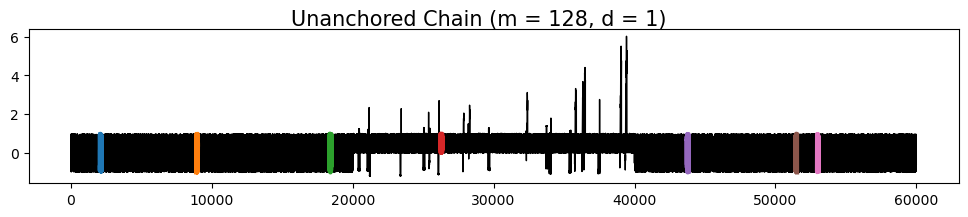

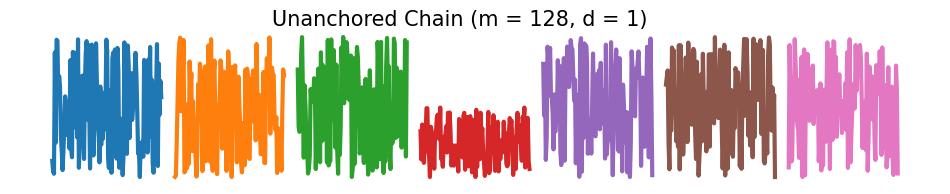

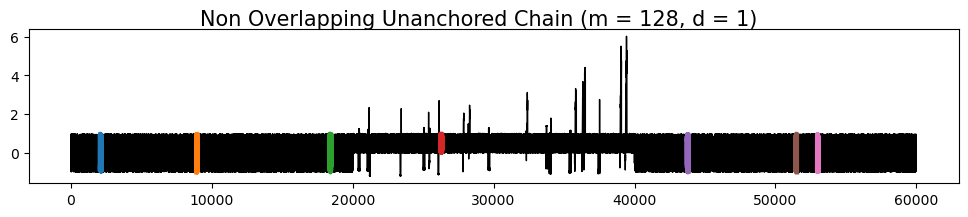

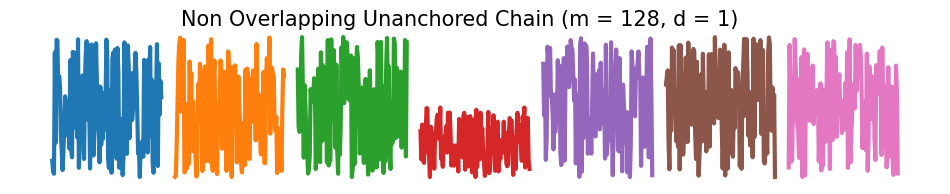

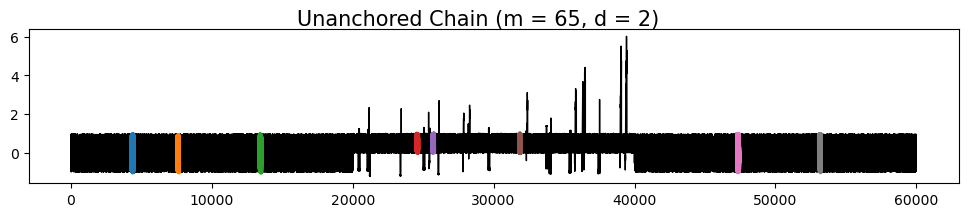

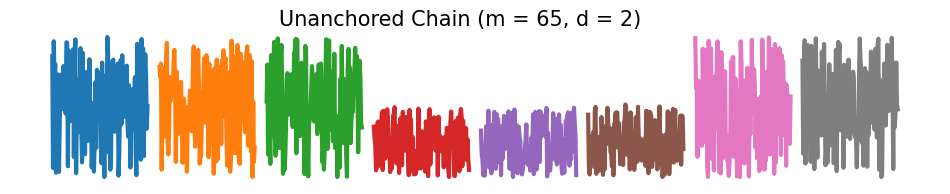

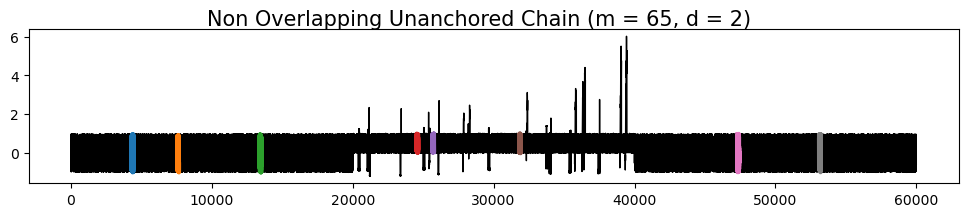

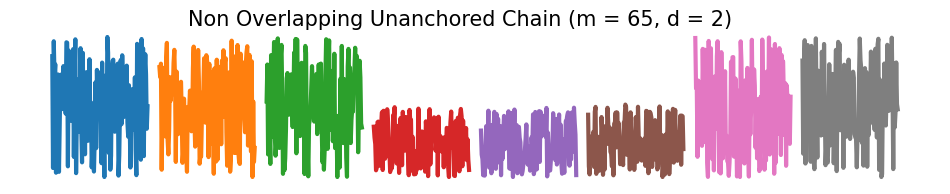

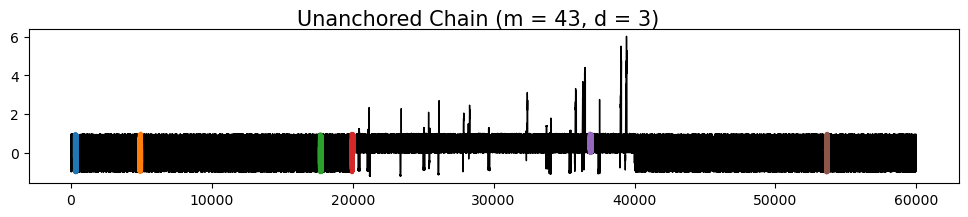

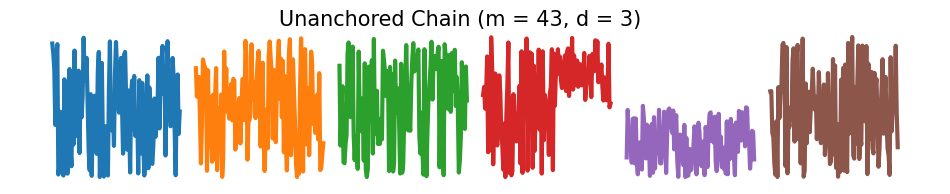

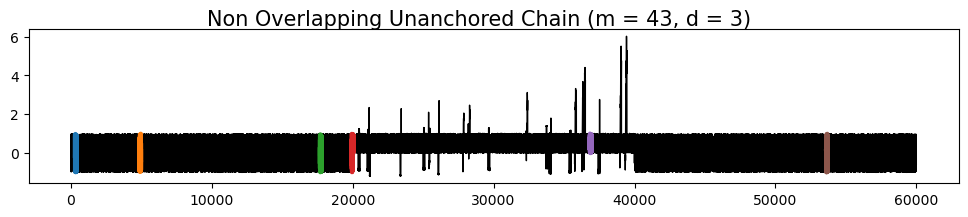

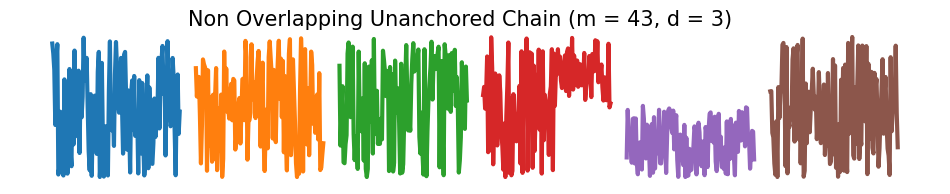

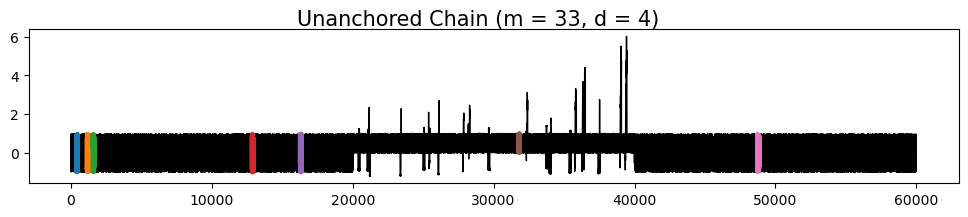

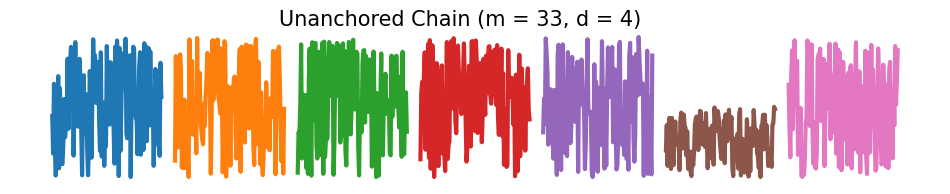

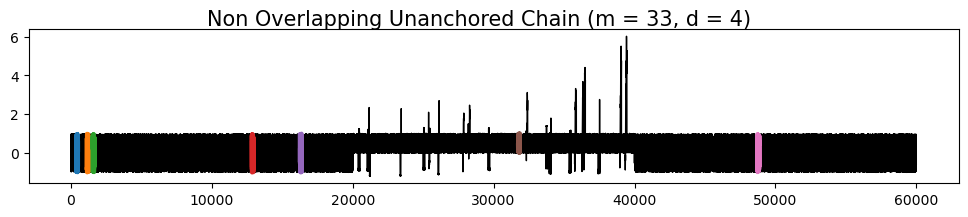

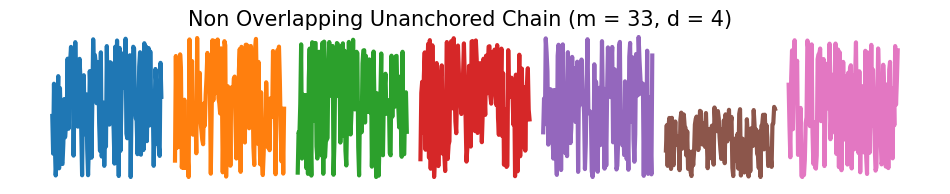

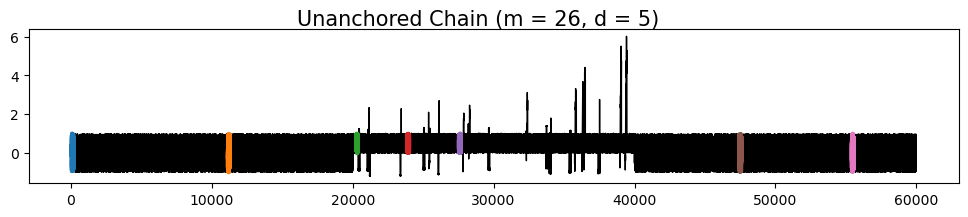

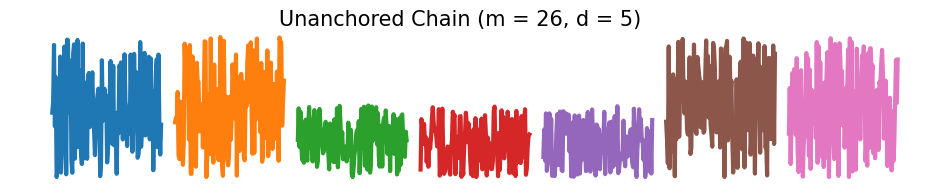

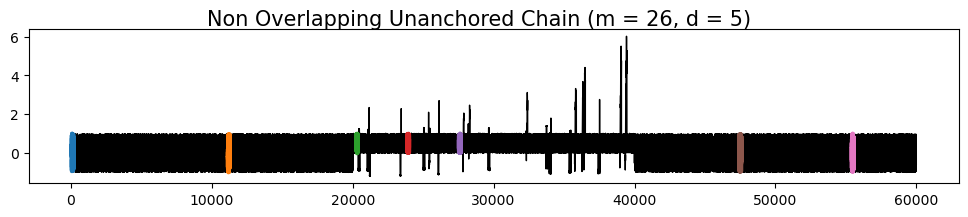

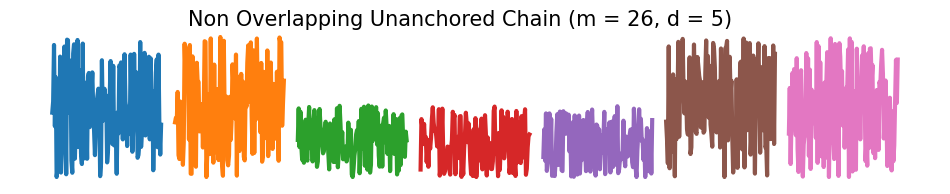

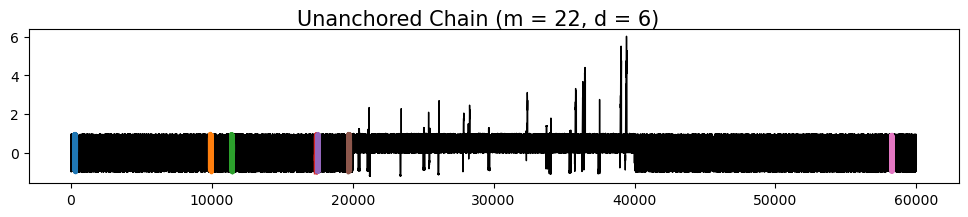

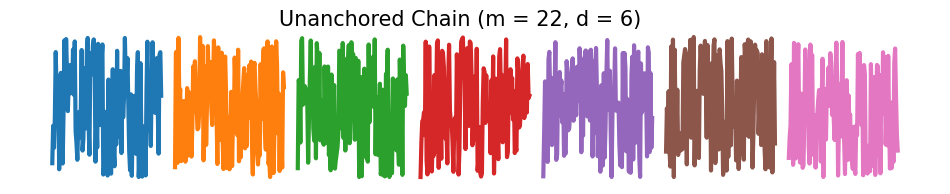

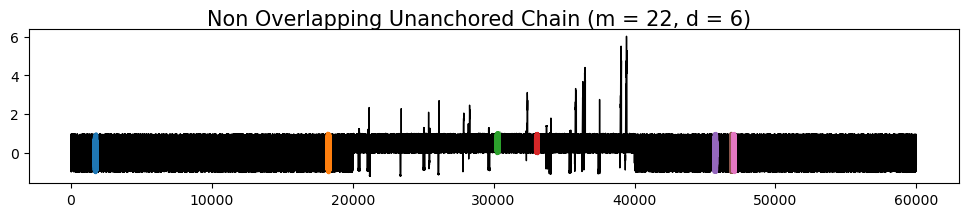

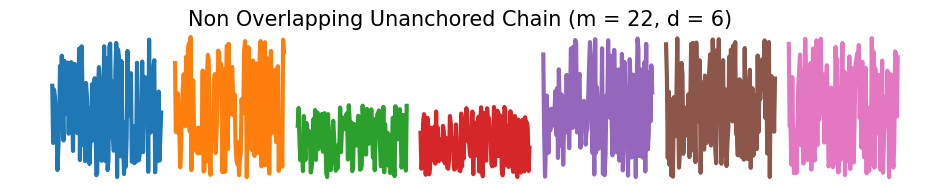

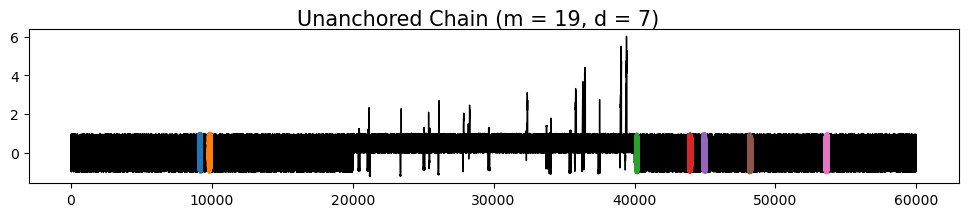

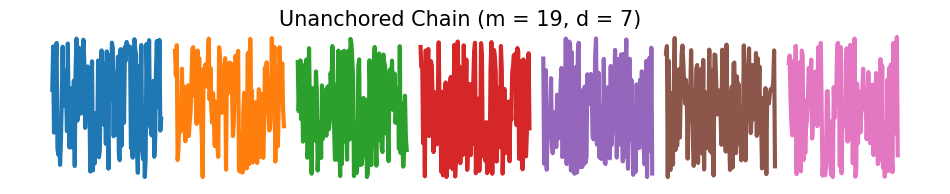

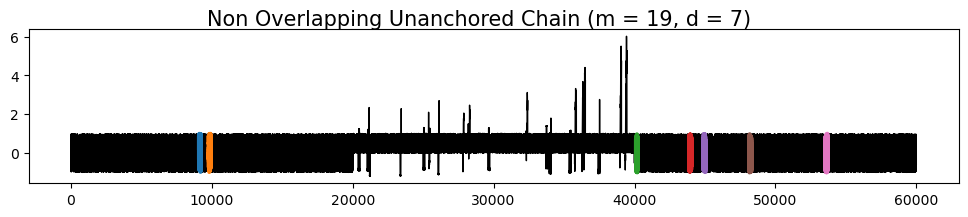

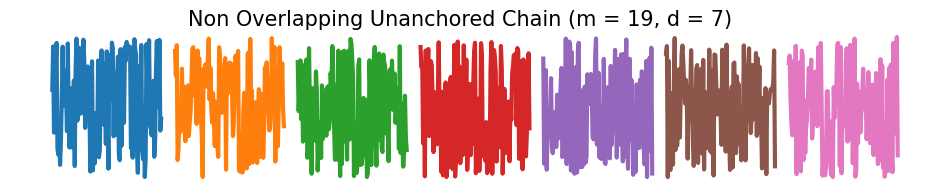

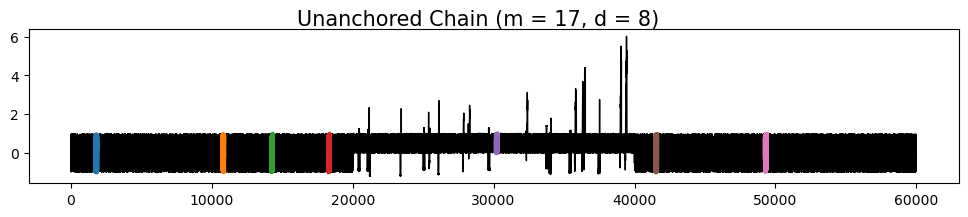

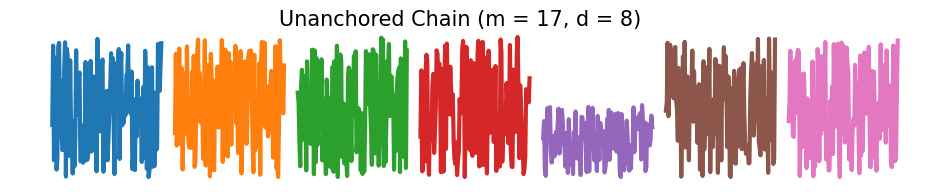

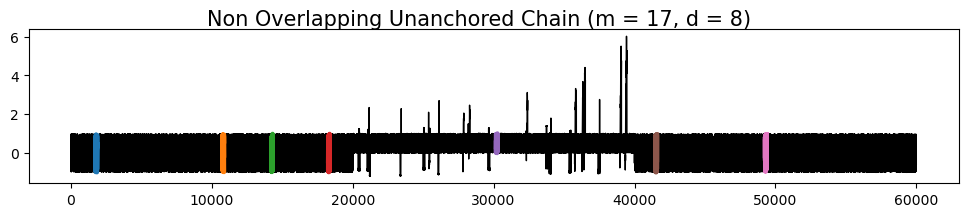

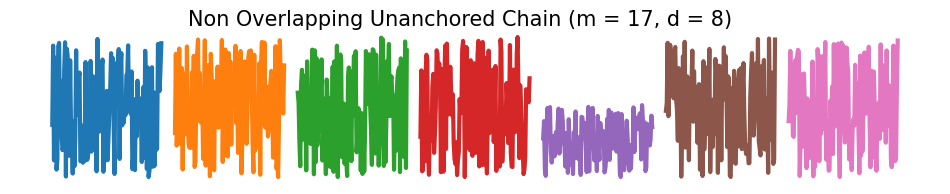

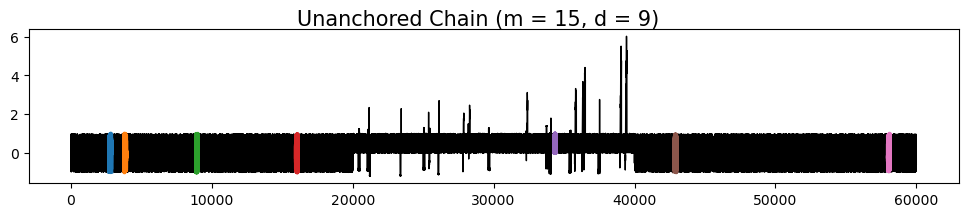

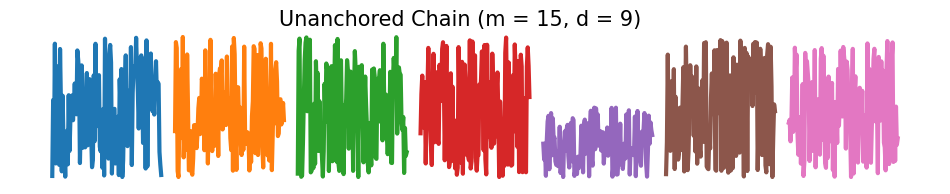

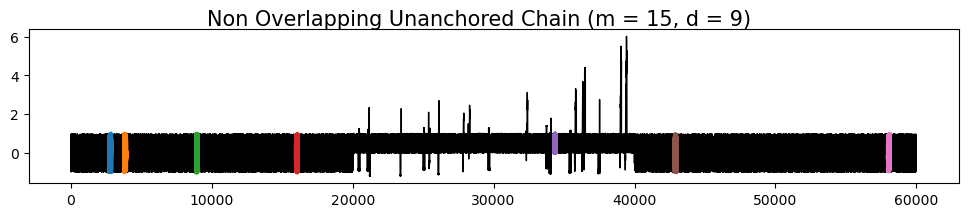

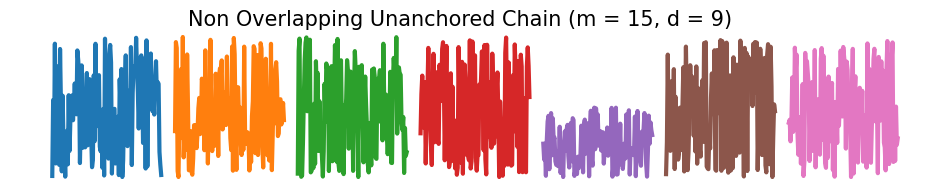

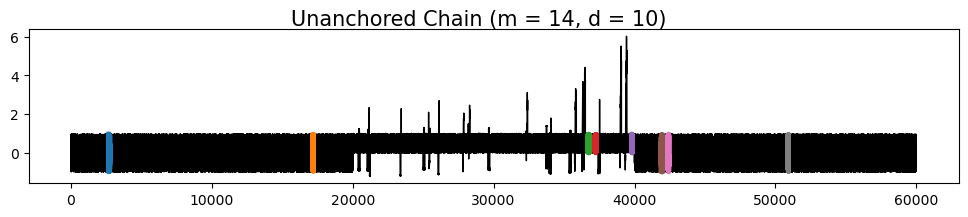

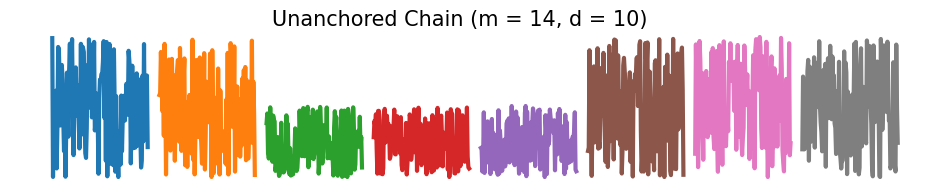

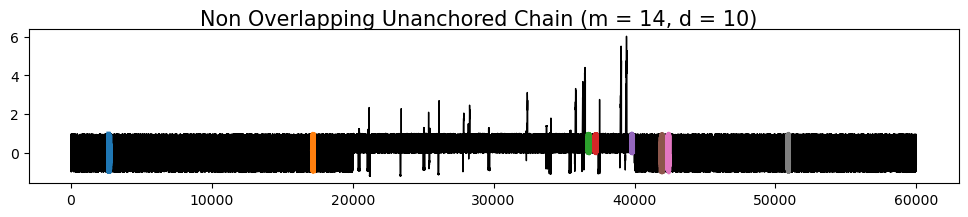

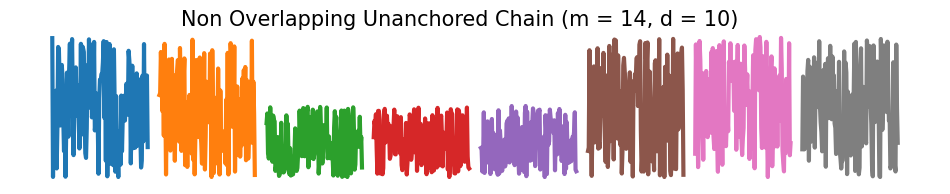

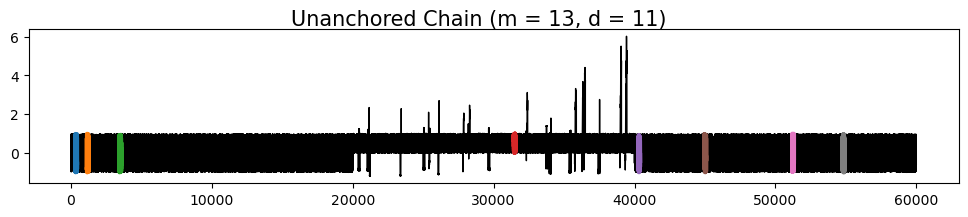

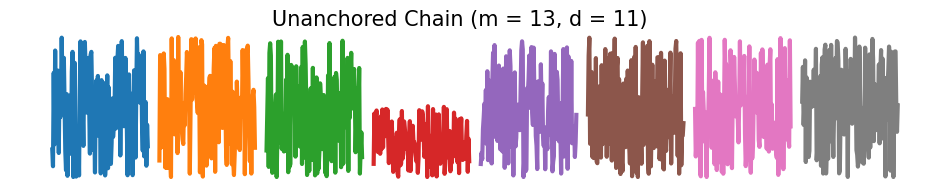

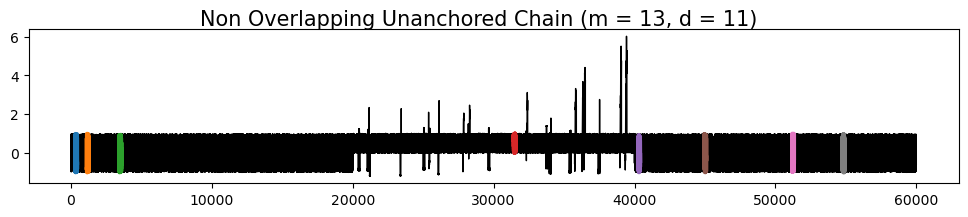

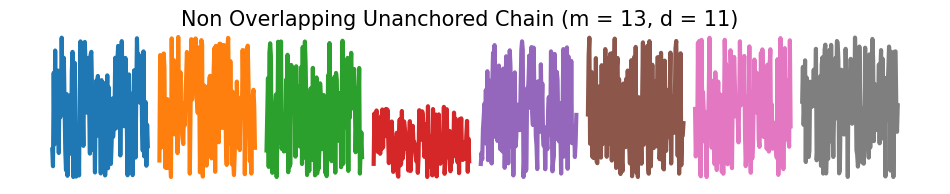

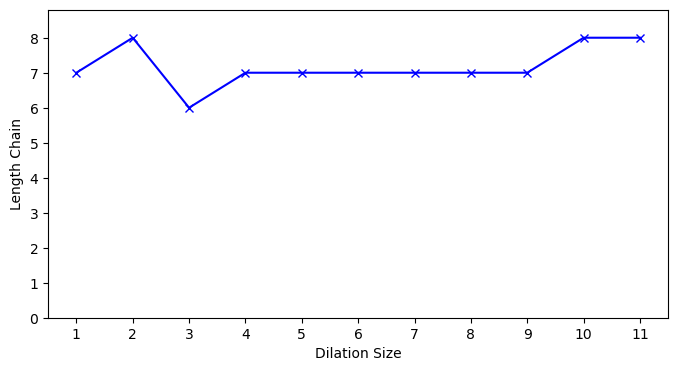

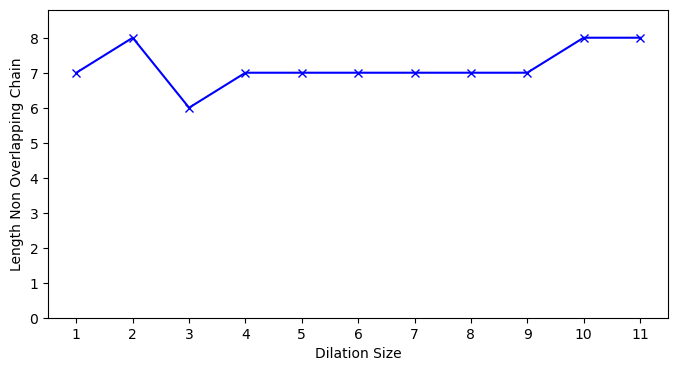

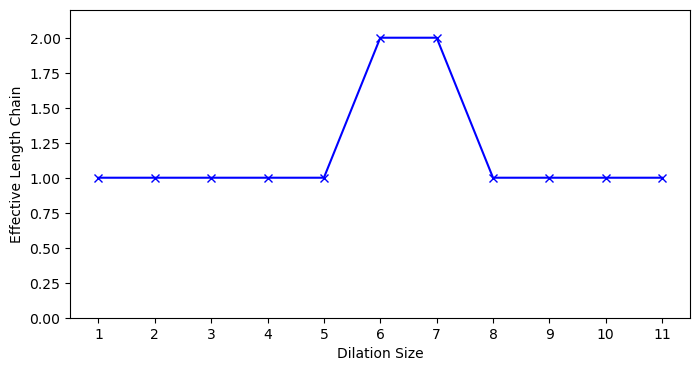

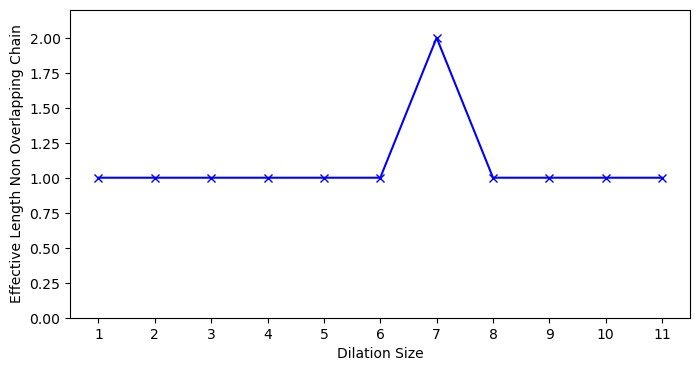

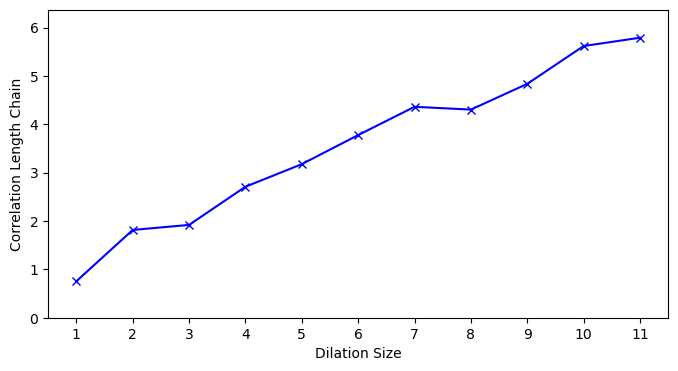

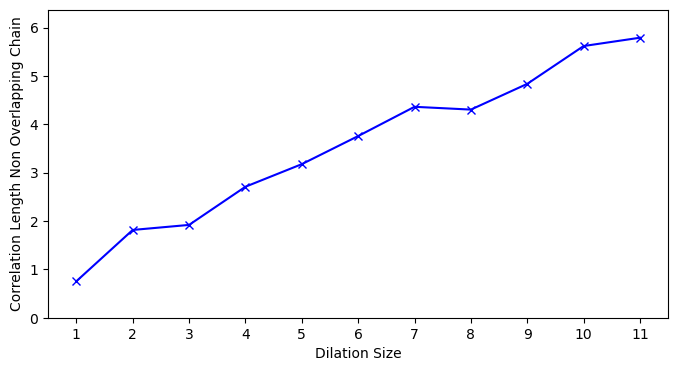

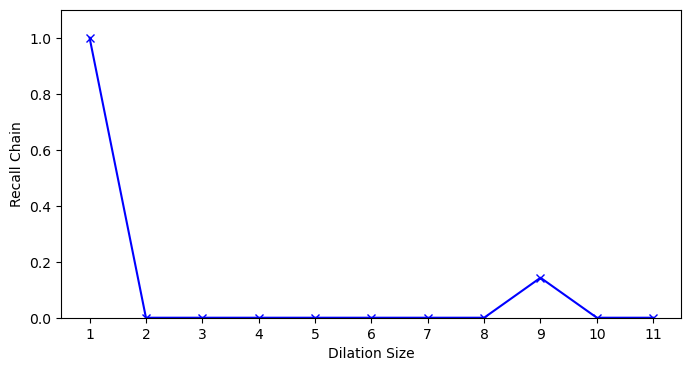

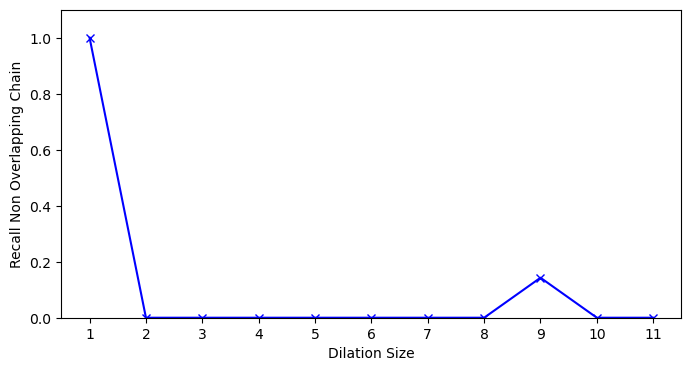

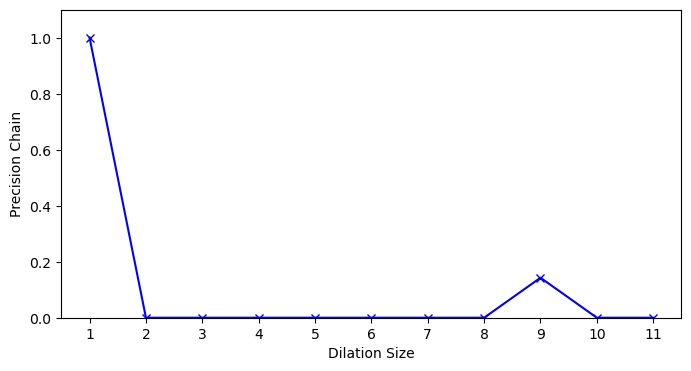

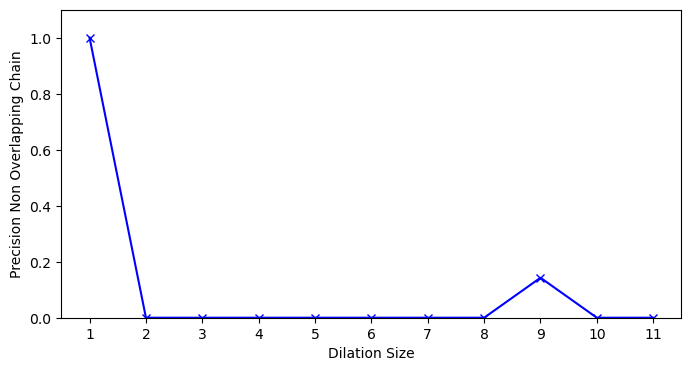

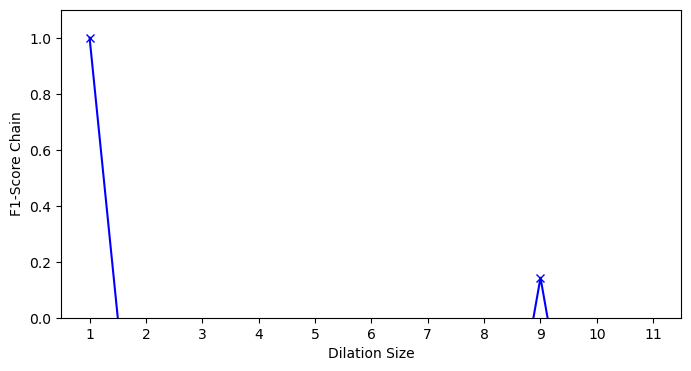

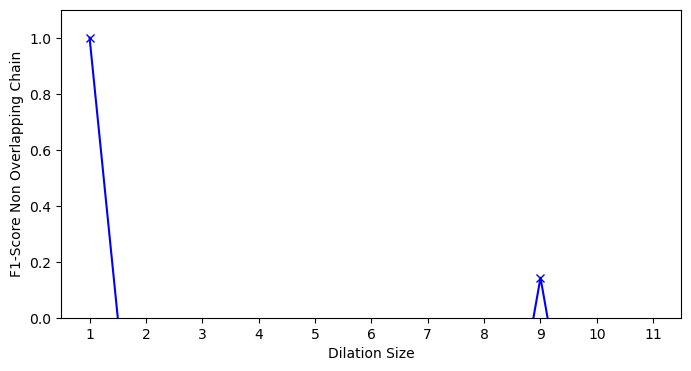

In [7]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, target_w, m, ground_truth)